
## Backpropagation

**The goal**: Find the weights $\mathbf{w}$ so to minimize the loss function.

**How to find these weights?** At every step of training, we can propagate forward to calculate the output of the neural network, then use gradient descent to update the weights.

### Example: 3 Layer Network

![nn](https://i.imgur.com/xHDm17g.png)

Consider $E(\mathbf{w}) = \frac{1}{2} \sum_{s=1}^m (y_{ds} - y_s)^2$

Where $y_{ds}$ is the desired output, and $y_s$ is the output of the model, with $1 \le s \le m$ ($m$ number of outputs). You can expand $y_s$. In a 3-layer neural network:

$$ E(\mathbf{w}) = \sum_{p=1}^m \left( y_{dp} - f_p^o \left( \sum_{q=1}^l w_{pq}^o z_q\right)\right)^2$$

where $z_q = f_q^h\left(\sum_{i=1}^n w_{qi}^h x_{di}\right)$

With **backpropagation**, we can compute $\frac{\partial E}{\partial w}$ for each $w$ in the network.

**Step 1**: Compute $\frac{\partial E}{\partial w_{kj}^o}$ for each pair $j,k$. This can be explicitly computed as

$\frac{\partial E}{\partial w_{kj}^o} = -(y_{ds}-  y_s) f_s^{o'}(\sum_{q=1}^l w_{sq}^o z_{q})z_j$, where

$\delta_s = (y_{ds} - y_s) f_s^{o'}(\sum_{q=1}^l w_{sq}^o z_q)$, so
    
$\frac{\partial E}{\partial w_{kj}^o} = \delta_s z_j$,   

The point being: After updating your outputs, you can update the gradients of each of the weights directed towards the output layer.

**Step 2**: Compute $\frac{\partial E}{\partial w_{kj}^h}$ for each pair $j,k$. This gradient relies on the weights in the output layer.

$$\frac{\partial E}{\partial w_{kj}^h} = - (\sum_{p=1}^m \delta_p w_{pj}^o f_j^{h'}(v_j))x_{di} $$

If there were more layers, you would apply the same formula to the weights on the previous layer.


### The short version

**Step 1**: Perform the **forward propagation**: Given inputs $\mathbf{x_1},\dots \mathbf{x_m}$, compute the outputs $y_1$, $y_2, \dots$.

**Step 1**: Compute $\delta_s$, which relies on the outputs of the model, use this to compute gradients for weights on the last layer.

**Step 2**: Compute gradients for weights on the second-to-last layer, which relies on computations of $\delta_s$ from the last layer.

If there is more than one hidden layer:

**Step 3**: Compute gradients for weights on the next layer, which relies on values calculated from the second-to-last layer.

**Step 4**: After all that's done, perform gradient descent on the weights:

$$ w_{kj}^{h(k+1)} = w_{kj}^{h(k)} - \eta \frac{\partial E}{\partial w_{kj}^h}$$

# Example: Perceptron

A **perceptron** is a binary classifier which will categorize the input data as $0$ or 1.

Mechanically, it's a neural network with an **input layer** and an **output layer**, with a step function as the activation function.
![Perceptron](https://i.imgur.com/RHfrnA1.png)

## Goal with this Problem:

We have a dataset of flowers which we want to classify as iris or not. The combination of flower petal length and width are highly correlated with whether a flower is an iris, so we can use a perceptron to train a model which can categorize these flowers appropriately.

![model](https://i.imgur.com/uzW9O3A.png)

As a neural network: This is a neural network with 2 neurons in the input layer and 1 neuron in the output layer.

In [7]:
# Common imports
import numpy as np
import os
# to make this notebook's output stable across runs
# def reset_graph(seed=42):
#     tf.reset_default_graph()
#     tf.set_random_seed(seed)
#     np.random.seed(seed)
# To plot figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# Training

To train the data:
```python
per_clf = Perceptron(max_iter=100, tol=-np.infty, random_state=42)
per_clf.fit(X, y)
```
To predict on new data:
```python
y_pred = per_clf.predict(Xnew)
```
For a model with 2 inputs, perceptron is $y = f(w_0 + w_1 x_1 + w_2 x_2)$, where $f$ is the step function:

If $w_0 + w_1 x_1 + w_2 x_2 \ge 0$, then $y = 1$.

If $w_0 + w_1 x_1 + w_2 x_2 < 0$ then $y = 0$.

So the perceptron divides the region of predicted iris vs non-predicted iris with a line: $x_2 = - \frac{w_1}{w_2}x_1 - \frac{w_0}{w_2}$

The perceptron stores $w_0$ in the perceptron object's ```intercept_``` property, and it stores $w_1, w_2$ in ```coef_```.


In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
iris = load_iris() # default dataset
X = iris.data[:, (2, 3)] # petal length, petal width
y = (iris.target == 0).astype(np.int)
per_clf = Perceptron(max_iter=100, tol=-np.infty, random_state=42)
per_clf.fit(X, y)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=100, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=42, shuffle=True, tol=-inf,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [4]:
iris.data[0:4]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2]])

Each of the columns of iris represents a feature of the plant. If you just use petal length and petal width as the input features, then we'll be able to plot it.

# Prediction

In [3]:
y_pred = per_clf.predict([[2, 0.5]])
print(y_pred)

[1]


In [4]:
print("w_0: {}".format(per_clf.intercept_))
print("w_1: {}, w_2: {}".format(per_clf.coef_[0][0], per_clf.coef_[0][1]))

w_0: [4.]
w_1: -1.4, w_2: -2.2


In [29]:
[a * axes[0] + b, a * axes[1] + b]

[array([1.81818182]), array([-1.36363636])]

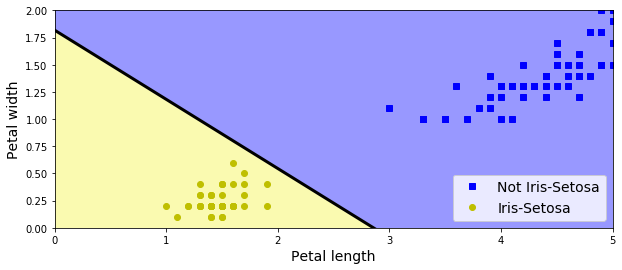

In [30]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1] # -w1 / w2, slope
b = -per_clf.intercept_ / per_clf.coef_[0][1] # -w0/w2, y-intercept
axes = [0, 5, 0, 2]
x0, x1 = np.meshgrid(
 np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
 np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
 )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)
plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")
# This plots a line from $(0,-w1/w2 * 0 - w0/w2) to (5, -w1/w2 * 5 - w0/w2)
plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-",
linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0']) # yellow and blue
plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)
plt.show()

### Explaining the Code

We initialize the meshgrid: Here $x$ ranges from $0$ to $5$, and $y$ ranges from 0 to 2. This will result in a $200 \times 500 meshgrid$, where $x0$ is a $200 \times 500$ matrix containing the x-values of each point,

$x1$ is a $200 \times 500$ matrix containing the y-values of each point.

In [23]:
axes = [0, 5, 0, 2]
x0_, x1_ = np.meshgrid(
 np.linspace(axes[0], axes[1], 5).reshape(-1, 1),
 np.linspace(axes[2], axes[3], 2).reshape(-1, 1),
 )
print("x0: {}".format(x0_))
print("x1: {}".format(x1_))
X_new1 = np.c_[x0_.ravel(), x1_.ravel()] # X_new1 forms the list of all the points to plot
print("Xnew: {}".format(X_new1))
y_predict1 = per_clf.predict(X_new1)
print("Predictions: {}".format(y_predict1))

x0: [[0.   1.25 2.5  3.75 5.  ]
 [0.   1.25 2.5  3.75 5.  ]]
x1: [[0. 0. 0. 0. 0.]
 [2. 2. 2. 2. 2.]]
Xnew: [[0.   0.  ]
 [1.25 0.  ]
 [2.5  0.  ]
 [3.75 0.  ]
 [5.   0.  ]
 [0.   2.  ]
 [1.25 2.  ]
 [2.5  2.  ]
 [3.75 2.  ]
 [5.   2.  ]]
Predictions: [1 1 1 0 0 0 0 0 0 0]


## Plotting

The perceptron generates a line which splits the data between iris and non-iris predictions. We have the formula of the line, so we can plot it like so:

In [31]:
print([axes[0], axes[1]])
print([a * axes[0] + b, a * axes[1] + b])

[0, 5]
[array([1.81818182]), array([-1.36363636])]


## Indexing
We're given which flowers are iris, and which ones aren't. To label them appropriately, we can index the points.

In [5]:
print(X[0:4])
print(y[0:4])

[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]]
[1 1 1 1]


```X[y==0]``` returns the data points for which $y = 0$.
```X[y==0,0]``` returns the first element of each of these points.
```
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
```
plots the not iris-setosa points as blue points.

In [6]:
print("The data points which aren't iris: {}".format(X[y==0][0:4]))
print("The petal lengths which aren't iris: {}".format(X[y==0,0][0:4]))

The data points which aren't iris: [[4.7 1.4]
 [4.5 1.5]
 [4.9 1.5]
 [4.  1.3]]
The petal lengths which aren't iris: [4.7 4.5 4.9 4. ]


In [ ]:
plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-",
linewidth=3)